In [1]:
import pandas as pd
import numpy as np
import nltk

### Datasets link
https://github.com/skathirmani/datasets

In [2]:
modi = pd.read_csv('https://github.com/skathirmani/datasets/raw/master/narendramodi_tweets.csv')
modi.shape

(3220, 14)

In [3]:
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [5]:
modi['date'] = pd.to_datetime(modi['created_at'], format='%Y-%m-%d %H:%M:%S')
modi['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

In [6]:
modi['date'].min(), modi['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [8]:
!pip install wordcloud

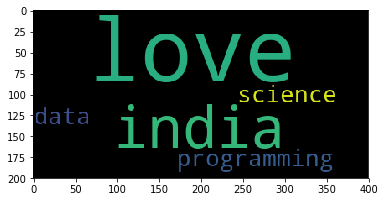

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud().generate('i love india. i love programming. i love data science')
plt.imshow(wc)

In [20]:
' '.join(['i', 'love', 'india'])
#' '.join(modi['text'])

'i love india'

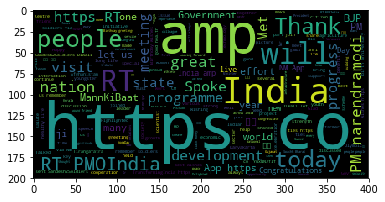

In [21]:
wc = WordCloud().generate(' '.join(modi['text']))
plt.imshow(wc)

## Text Transformations or Text Cleaning
- Convert every character to lowercase
- Remove special characters, numbers
- Remove common stop words (ex:of, the, is, was)
- Remove junk words (ex: amp, rt, https)
- Identify root of the word (Stemming)

In [22]:
docs = modi['text'].str.lower()
docs.head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

### Regular Expression

In [31]:
docs.str.replace('the', '-').head() # Replace the with -
docs.str.replace('rt', '').head() # Remove rt
docs.str.replace('[a-z]', '').head() # Remove all alphabets
docs.str.replace('[0-9]', '').head() # Remove all numbers
docs.str.replace('[^a-z]', '').head() # Retain all alphabets
docs.str.replace('[^a-z ]', '').head() # Retain all alphabets, spaces
docs.str.replace('[^a-z #@]', '').head() # Retain all alphabets, spaces, #@ symbols


0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

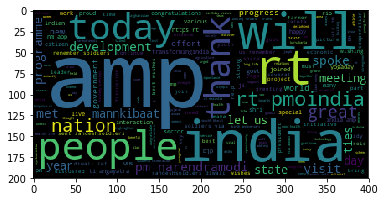

In [32]:
docs = docs.str.replace('[^a-z #@]', '')
wc = WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [41]:
#nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# len(stop_words)
junk_words = ['amp', 'rt', 'https', 'will']

stop_words.extend(junk_words)
len(stop_words)

183

In [40]:
x =  [1,2,3,4]
y = [5,6,7]

x.extend(y)
x

[1, 2, 3, 4, 5, 6, 7]

In [58]:
stemmer = nltk.PorterStemmer()
stemmer.stem('playing')
stemmer.stem('played')
stemmer.stem('plays')

stemmer.stem('president')

'presid'

In [63]:
stemmer = nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words \
                 if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)

docs_clean = docs.apply(lambda v: clean_text(v))
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

## Bag of word analysis

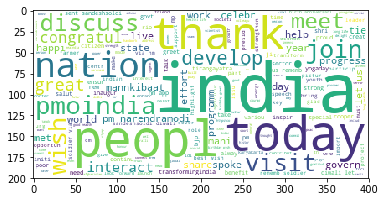

In [70]:
wc = WordCloud(background_color="white").generate(' '.join(docs_clean))
plt.imshow(wc)

## Hashtag Analysis

In [72]:
hashtags = []

for row in docs_clean:
    row_words = row.split(' ')
    row_hashtags = [word for word in row_words if word.startswith('#')]
    hashtags.extend(row_hashtags)
hashtags[:5]

['#transformingindia',
 '#presidentmu',
 '#presidentmukherje',
 '#pr',
 '#presidentmukherje']

In [74]:
len(np.unique(hashtags))

218

In [75]:
freq_hashtags = pd.Series(hashtags).value_counts()
freq_hashtags.head()

#sandeshsoldi         110
#mannkibaat            92
#tirangayatra          84
#yogaday               53
#transformingindia     52
dtype: int64

### Frequencyof the hashtag #sandeshsoldi across months

In [107]:
modi['year_month'] = modi['date'].dt.strftime('%Y-%m')
modi[['date', 'year_month']].head(1)

,date,year_month
0,2017-01-31 11:00:07,2017-01


In [99]:
modi['sandeshsoldi'] = docs_clean.apply(lambda v: \
                                          1 if 'sandeshsoldi' in v else 0)
modi['sandeshsoldi'].value_counts()

0    3105
1     115
Name: sandeshsoldi, dtype: int64

Text(0.5, 1.0, 'Trending analysis on hashtag sandeshsoldi')

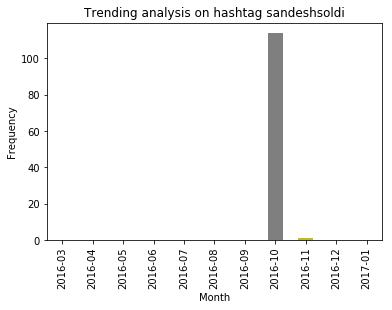

In [106]:
modi.groupby('year_month')['sandeshsoldi'].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Trending analysis on hashtag sandeshsoldi')

Text(0.5, 1.0, 'Trending analysis on hashtag mannkibaat')

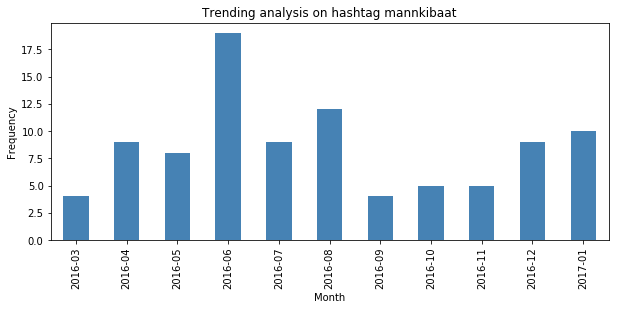

In [114]:
search_term = 'mannkibaat'
modi[search_term] = docs_clean.apply(lambda v: \
                                          1 if search_term in v else 0)
modi.groupby('year_month')[search_term].sum().plot.bar(color='steelblue', figsize=(10,4))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Trending analysis on hashtag %s' % search_term)

# Unstructured Data to structured data

### Document Term Matrix

In [115]:
amazon = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/amazon_reviews.csv')
amazon.shape

(999, 10)

In [118]:
amazon.head(1)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09


In [121]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]', '')
docs.head(1)

0    we got this gps for my husband who is an otr o...
Name: reviewText, dtype: object

In [120]:
def clean_text(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
docs_clean = docs.apply(clean_text)
docs_clean.head(1)

0    got gps husband otr road trucker  impressed sh...
Name: reviewText, dtype: object

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())
#df_dtm.head()

In [130]:
df_dtm.shape # High dimension data

(999, 9438)

In [136]:
(((df_dtm == 0).sum()).sum()) / (df_dtm.shape[0]*df_dtm.shape[1])

0.9940890243920547

#### close to 99.4% of the values in document term matrix is zero. Hence it is called as sparse matrix

### Term Frequency

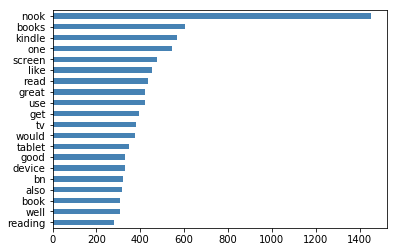

In [145]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh(color='steelblue')

### Identifying biggest documents

In [149]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(5)

387    1064
273     971
563     766
552     703
248     689
dtype: int64

In [154]:
amazon.loc[563]['reviewText'][:20]

'.Paid $[...] for thi'

### Correlation between terms

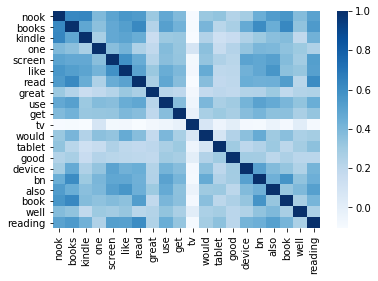

In [160]:
frequent_words = df_dtm.sum().sort_values(ascending=False).head(20).index
words_correlation = df_dtm[frequent_words].corr()
import seaborn as sns
sns.heatmap(words_correlation, cmap='Blues')

### Words Similarity (Semantic Analysis)

In [166]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity([df_dtm['book'], df_dtm['kindle']])
cos_sim

array([[1.        , 0.43291729],
       [0.43291729, 1.        ]])

In [172]:
cos_sim = pd.DataFrame(cosine_similarity(df_dtm.T),
                       index=df_dtm.columns,
                       columns=df_dtm.columns)
cos_sim.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
aac,0.0,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abandoning,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abilities,0.0,0.5,0.0,1.000000,0.051848,0.032616,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.387298,0.00000,0.0,0.000000
ability,0.0,0.0,0.0,0.051848,1.000000,0.202930,0.103695,0.0,0.0,0.0,...,0.0,0.119737,0.0,0.20739,0.0,0.0,0.133870,0.20739,0.0,0.073324


In [194]:
def get_similar_words(word, cos_sim):
    cos_sim_word = cos_sim[word].sort_values(
        ascending=False).drop(word).head(5).index
    return list(cos_sim_word)

get_similar_words('touch', cos_sim)

['screen', 'kindle', 'page', 'books', 'nook']

## Bigrams

In [204]:
cv = CountVectorizer(ngram_range=(2,2))
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())
df_dtm.shape

(999, 57437)

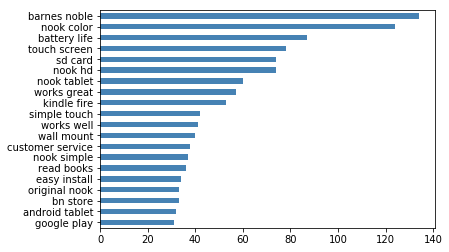

In [205]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh(color='steelblue')